In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import netCDF4 as nc
from scipy import spatial as spat

import sys
sys.path.append('../')
from src import data
from src import visualization as vis

import os

In [24]:
def get_datafiles_for_year(basedir, year, fname):
    directory = "{}/Year{}".format(basedir, year)
    dirs = list(os.walk(directory))
    subdirs = dirs[1:]
    file_paths = []
    for i in range(len(subdirs)):
        filename = "{}/{}".format(subdirs[i][0], fname)
        if os.path.exists(filename):
            file_paths.append(filename)

    return file_paths

def get_temp_for_year(basedir, year, fname):
    files = get_datafiles_for_year(basedir, year, fname)
    print(files)
    all_temps = np.zeros(shape=(102, 1)).T

    for f in files:
        d = nc.Dataset(f)

        temps = d.variables['T'][:, :].data.T

        all_temps = np.append(all_temps, temps, axis=0)

        d.close()

    return all_temps

def get_temp_for_all_years(basedir, years, fname):

    all_temps = np.empty(shape=(1,102))

    for y in years:
        temps = get_temp_for_year(basedir, y, fname)
        all_temps = np.append(all_temps, temps, axis=0)

    return all_temps

def get_depth_for_year(basedir, year, fname):
    files = get_datafiles_for_year(basedir, year, fname)
    print(files)
    all_depths = np.zeros(shape=(102, 1)).T

    for f in files:
        d = nc.Dataset(f)

        depths = d.variables['h'][:, :].data.T

        all_depths = np.append(all_depths, depths, axis=0)

        d.close()

    return all_depths

def get_depth_for_all_years(basedir, years, fname):

    all_depths = np.empty(shape=(1,102))

    for y in years:
        depths = get_temp_for_year(basedir, y, fname)
        all_depths = np.append(all_depths, depths, axis=0)

    return all_depths

In [25]:
all_temps = get_temp_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1984, "fiscm_group_001.nc")
all_temps = all_temps[1:, :]

['../../model_runs/data/atlantic-cod/baseline_data/Year1984/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/04-apr/fiscm_group_001.nc']


In [26]:
all_depths = get_depth_for_year("../../model_runs/data/atlantic-cod/baseline_data",
                                  1984, "fiscm_group_001.nc")
all_depths = all_depths[1:, :]

['../../model_runs/data/atlantic-cod/baseline_data/Year1984/01-jan/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/03-mar/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/05-may/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/02-feb/fiscm_group_001.nc', '../../model_runs/data/atlantic-cod/baseline_data/Year1984/04-apr/fiscm_group_001.nc']


<BarContainer object of 30 artists>

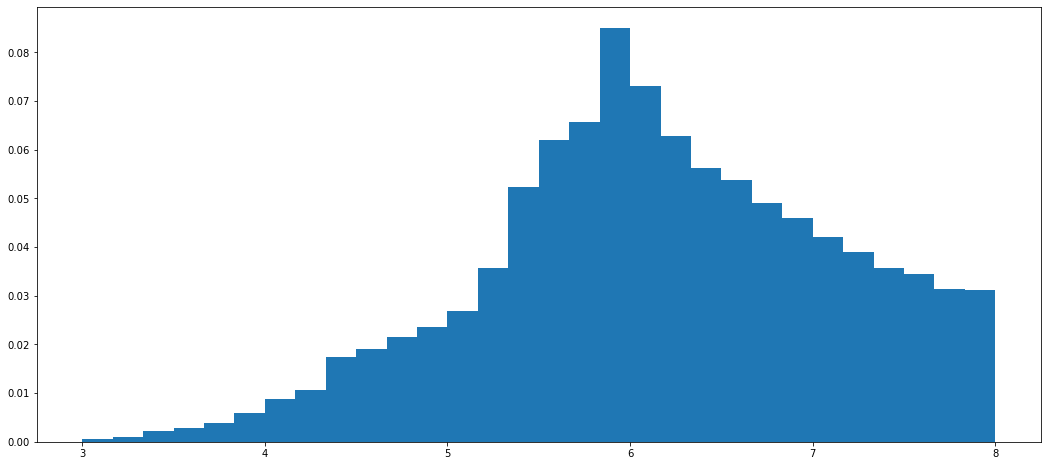

In [27]:
h, bins = np.histogram(all_temps, bins=30, range=(3, 8))
h = h/np.sum(h)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h, align='center', width=width)

<BarContainer object of 30 artists>

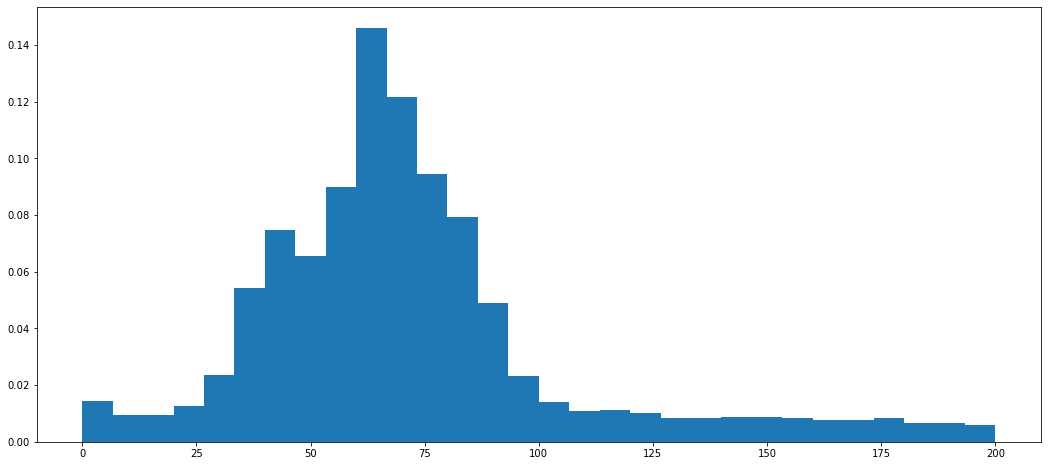

In [29]:
h, bins = np.histogram(all_depths, bins=30, range=(0, 200))
h = h/np.sum(h)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h, align='center', width=width)

In [21]:
settled_start, settled_end, settled = data.combine_data_for_year("../../model_runs/data/atlantic-cod/baseline_data/",
                                  1984, "settlement.nc")
settled=settled.astype(int)
sett_temp = settled_end[settled, 3]
sett_depth = settled_end[settled, 4]

Text(0.5, 0, 'Temperature (˚C)')

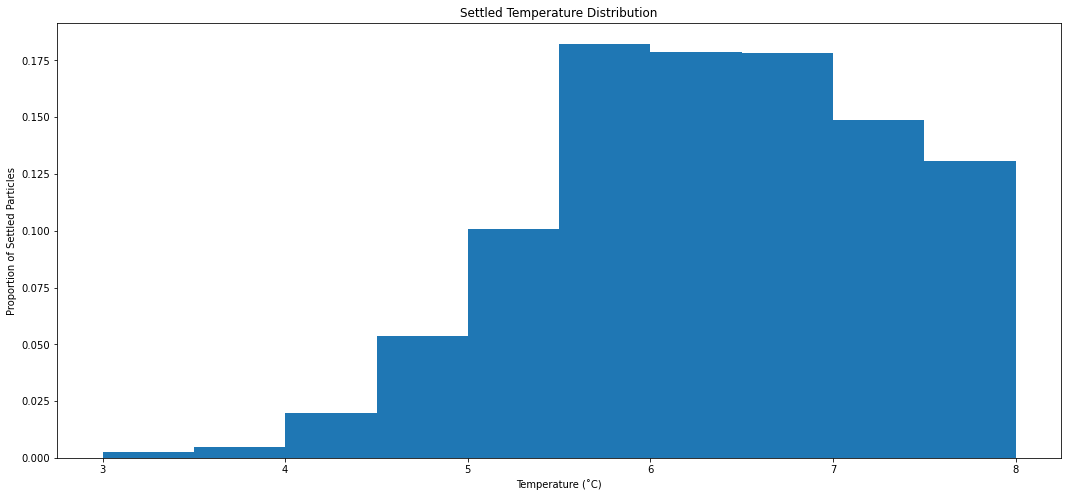

In [22]:
h_settled_temp, bins = np.histogram(sett_temp, bins=10)
h_settled_temp = h_settled_temp/np.sum(h_settled_temp)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_settled_temp, align='center', width=width)
ax.set_title("Settled Temperature Distribution")
ax.set_ylabel("Proportion of Settled Particles")
ax.set_xlabel("Temperature (˚C)")

Text(0.5, 0, 'Depth (m)')

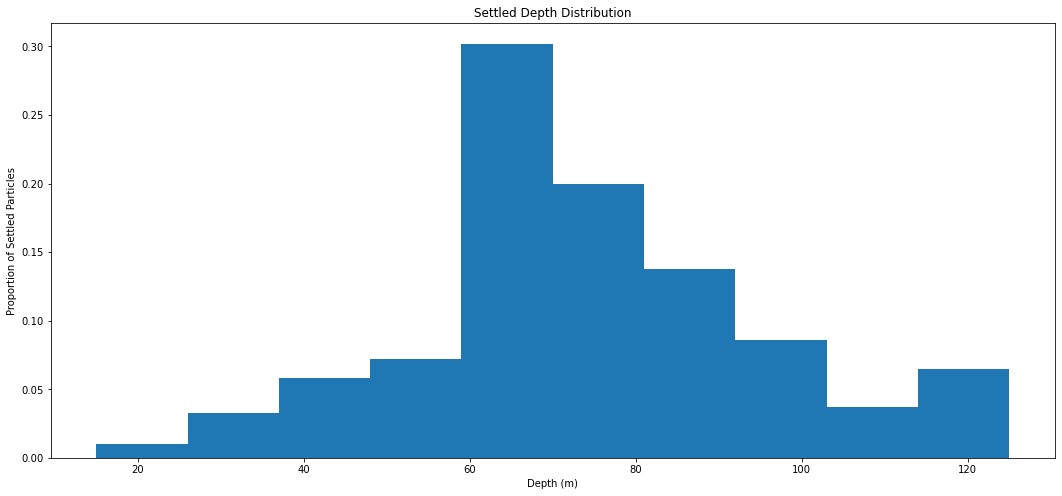

In [23]:
h_settled_depth, bins = np.histogram(sett_depth, bins=10)
h_settled_depth = h_settled_depth/np.sum(h_settled_depth)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_settled_depth, align='center', width=width)
ax.set_title("Settled Depth Distribution")
ax.set_ylabel("Proportion of Settled Particles")
ax.set_xlabel("Depth (m)")

Text(0.5, 0, 'Temperature (˚C)')

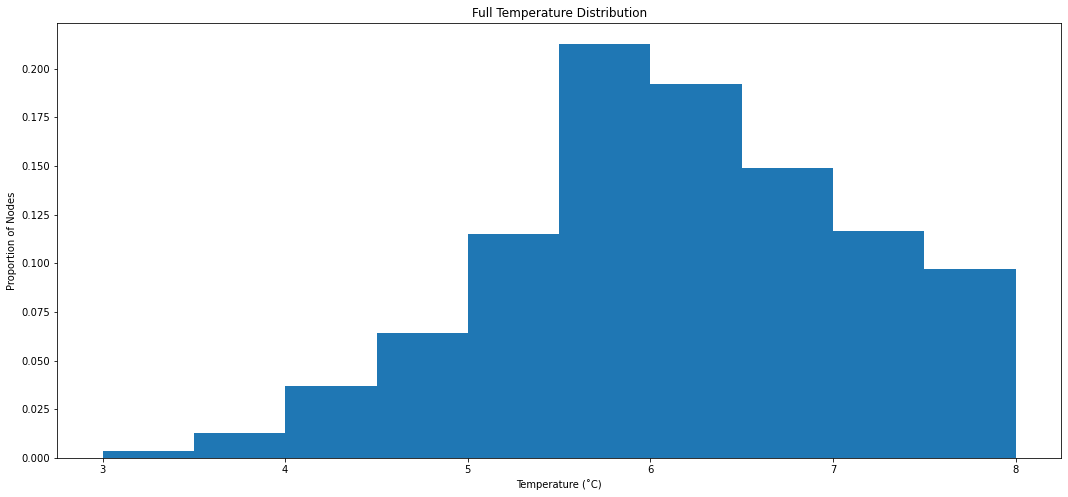

In [30]:
h_all_temps, bins = np.histogram(all_temps, bins=10, range=(3, 8))
h_all_temps = h_all_temps/np.sum(h_all_temps)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_all_temps, align='center', width=width)

ax.set_title("Full Temperature Distribution")
ax.set_ylabel("Proportion of Nodes")
ax.set_xlabel("Temperature (˚C)")

Text(0.5, 0, 'Depth (m)')

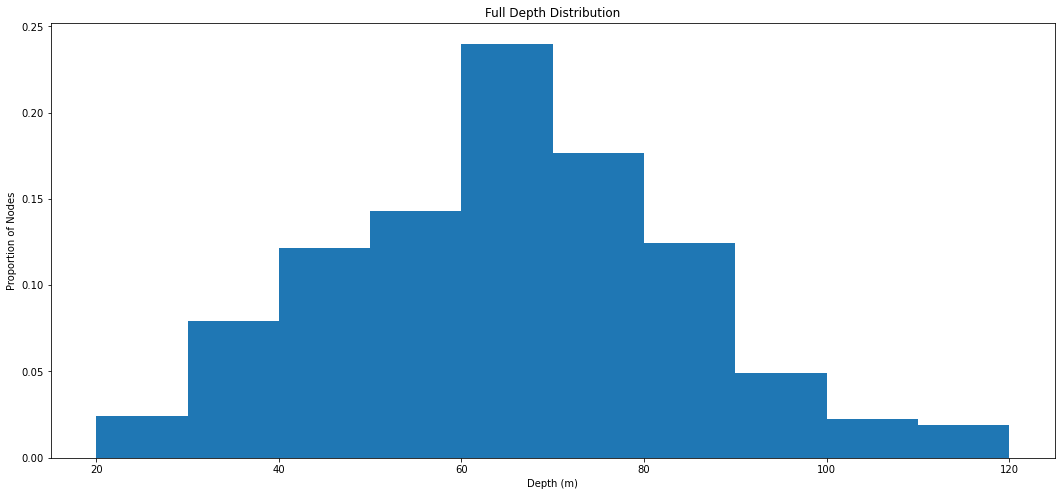

In [31]:
h_all_depths, bins = np.histogram(all_depths, bins=10, range=(20, 120))
h_all_depths = h_all_depths/np.sum(h_all_depths)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_all_depths, align='center', width=width)

ax.set_title("Full Depth Distribution")
ax.set_ylabel("Proportion of Nodes")
ax.set_xlabel("Depth (m)")

Text(0.5, 0, 'Temperature (˚C)')

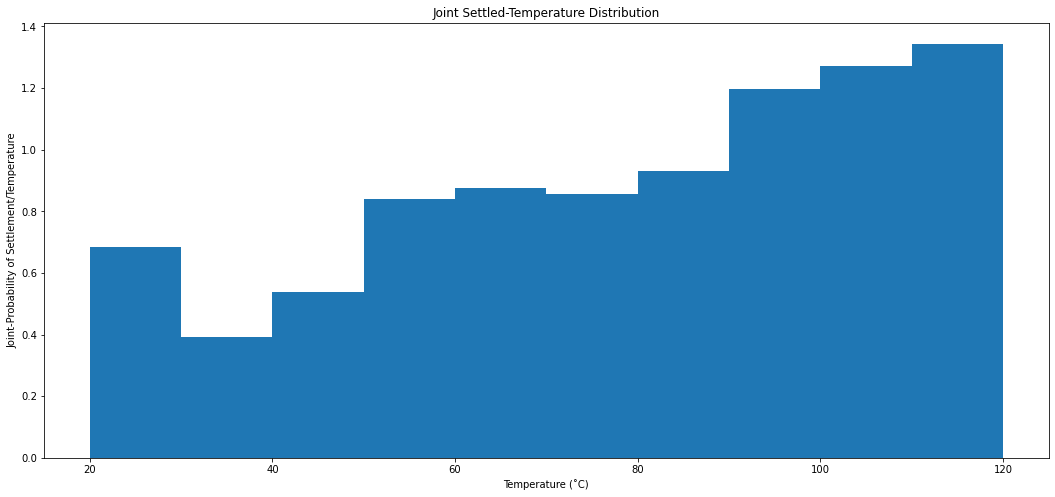

In [32]:
h_std = h_settled_temp/h_all_temps

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_std, align='center', width=width)

ax.set_title("Joint Settled-Temperature Distribution")
ax.set_ylabel("Joint-Probability of Settlement/Temperature")
ax.set_xlabel("Temperature (˚C)")

Text(0.5, 0, 'Depth (m)')

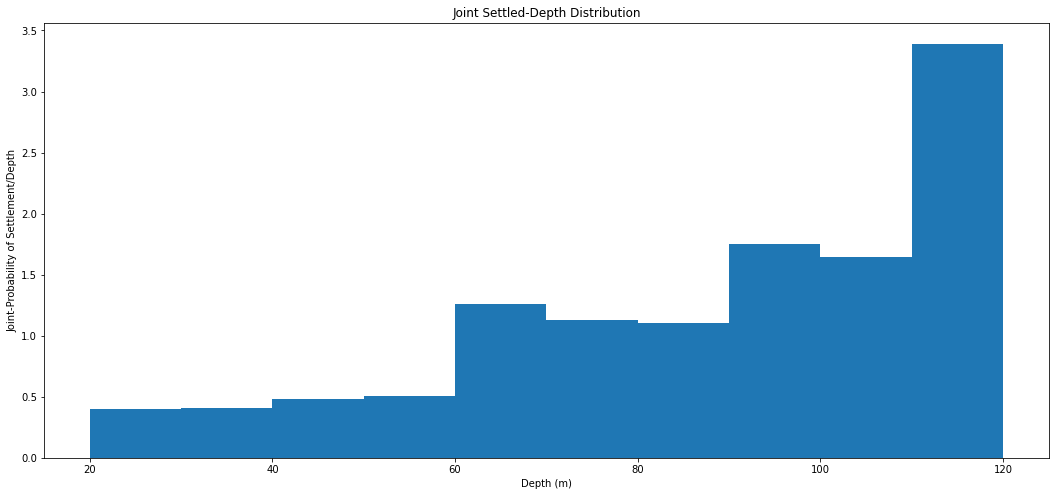

In [34]:
h_std = h_settled_depth/h_all_depths

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

ax.bar(center, h_std, align='center', width=width)

ax.set_title("Joint Settled-Depth Distribution")
ax.set_ylabel("Joint-Probability of Settlement/Depth")
ax.set_xlabel("Depth (m)")

In [36]:
np.sum(h_std*h_settled_depth)

1.2709970467508434